In [1]:
# ИМПОРТ БИБЛИОТЕК 
import tensorflow as tf
from tensorflow import keras

In [2]:
# ИМПОРТ ДАННЫХ
clothes = keras.datasets.fashion_mnist
(X_train,y_train), (X_test, y_test) = clothes.load_data()

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

Using TensorFlow backend.


In [4]:
from keras import utils

In [5]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кросовки', 'сумка', 'ботинки']

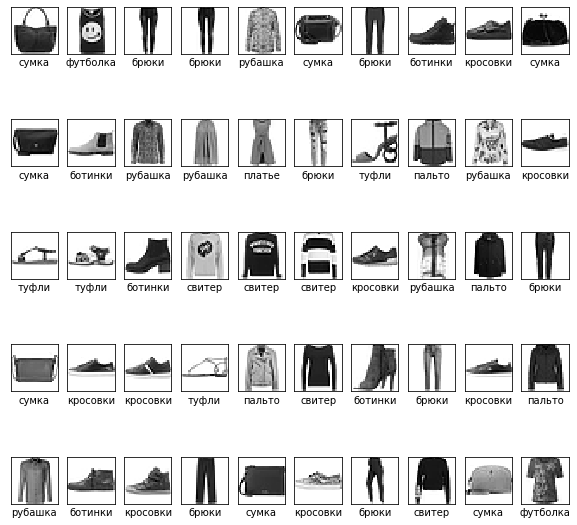

In [6]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

In [7]:
X_train = X_train.reshape(60000,784)
X_train = X_train/255
X_test = X_test.reshape(10000,784)
X_test = X_test/255
y_test = utils.to_categorical(y_test, 10)

In [8]:
y_train = utils.to_categorical(y_train, 10)

In [9]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
model = Sequential()

model.add(Dense(800, input_dim = 784, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
model.fit(X_train, y_train, 
          batch_size = 200, 
          epochs = 100,
          validation_split = 0.2, 
          verbose = 1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 2s 35us/step - loss: 0.2451 - accuracy: 0.9172 - val_loss: 0.2939 - val_accuracy: 0.8947
Epoch 2/100
48000/48000 [==============================] - 2s 34us/step - loss: 0.2444 - accuracy: 0.9162 - val_loss: 0.2964 - val_accuracy: 0.8932
Epoch 3/100
48000/48000 [==============================] - 2s 35us/step - loss: 0.2440 - accuracy: 0.9165 - val_loss: 0.2916 - val_accuracy: 0.8957
Epoch 4/100
48000/48000 [==============================] - 2s 39us/step - loss: 0.2437 - accuracy: 0.9173 - val_loss: 0.2932 - val_accuracy: 0.8948
Epoch 5/100
48000/48000 [==============================] - 2s 39us/step - loss: 0.2429 - accuracy: 0.9176 - val_loss: 0.2957 - val_accuracy: 0.8937
Epoch 6/100
48000/48000 [==============================] - 2s 37us/step - loss: 0.2426 - accuracy: 0.9172 - val_loss: 0.2937 - val_accuracy: 0.8953
Epoch 7/100
48000/48000 [==============================] - 2s 

In [12]:
predictions = model.predict(X_train)

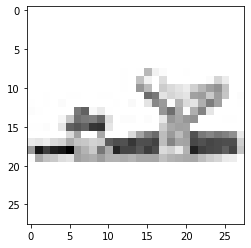

In [13]:
n = 59999
plt.imshow(X_train[n].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [14]:
np.argmax(predictions[n])

5

In [15]:
classes[np.argmax(predictions[n])]

'туфли'

In [16]:
np.argmax(y_train[n])

5

In [17]:
classes[np.argmax(y_train[n])]

'туфли'

In [18]:
model.save('fashion_mnist_dense.h5')

In [19]:
# Оценка качества обучения
scores = model.evaluate(X_test, y_test, verbose = 1)

10000/10000 [==============================] - 0s 37us/step


In [23]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 87.12
